<h1><center>Escola Polit√©nica da Universidade de S√£o Paulo</h1></center> 
<br>

<img src="minerva.jpg">

<br>

<h1><center>PSI 3431 - Processamento Estat√≠stico de Sinais</h1></center> 

<h1><center>Experi√™ncia 3: Densidade Espectral de Pot√™ncia e Ru√≠do de Quantiza√ß√£o</h1></center>

<h1><center>Gabriel Moraes da Cruz NUSP: 10335020</h1></center> 

<h1><center>Thiago Souza Santos NUSP: 10335260</h1></center>



**Tarefas:**

Calcule a rela√ß√£o sinal/ruƒ±ÃÅdo (SNR), em dB.
Vamos usar o seguinte filtro para reduzir o efeito do ruƒ±ÃÅdo:

‚Ä¢ Um filtro IIR H I (z) usando a aproxima√ß√£o elƒ±ÃÅptica. Voc√™ pode usar as
fun√ß√µes ellipord e ellip para o projeto (seu uso √© semelhante ao das
fun√ß√µes usadas na Experi√™ncia 3).
Projete o filtro usando as especifica√ß√µes abaixo (escolha adequadamente œâ p )

‚Ä¢ Faixa de passagem: 0 ‚â§ œâ ‚â§ œâ p ,

‚Ä¢ Faixa de rejei√ß√£o: 0,2œÄ rad/amostra = œâ r ‚â§ œâ ‚â§ œÄ rad/amostra,

‚Ä¢ Atenua√ß√£o mƒ±ÃÅnima na faixa de rejei√ß√£o: 40 dB,

‚Ä¢ Queda m√°xima na faixa de passagem Œ¥ p = 0,05.

In [35]:
using PyPlot, FixedPointNumbers, EllipsisNotation, SampledSignals, PyCall, DSP, Polynomials, Statistics;

In [36]:
sig = pyimport("scipy.signal");
matplotlib = pyimport("matplotlib.pyplot")
include("fxfilt.jl");
np = pyimport("numpy");

In [37]:
fo = 100œÄ;
fa = 40e3;
Ta=1/fa;
n=0:Ta:3;
s = 0.5*cos.(2œÄ*fo*n) + 0.3*cos.(4œÄ*300*n) + 0.15*cos.(6œÄ*fo*n);

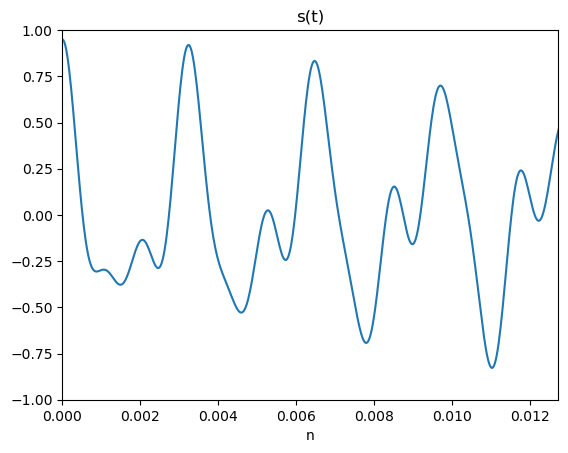

In [38]:
plot(n,s);
axis([0, 4/fo, -1, 1])
title("s(t)");
xlabel("n");

## √çtem 1 
Quantize os coeficientes  filtro, e calcule a resposta em frequ√™ncia considerando os coeficientes quantizados. Compare com a resposta em frequ√™ncia desejada (n√£o √© necess√°rio refazer o projeto para atender √†s especifica√ß√µes).

In [39]:
sq = Fixed{Int16,4}.(s);

In [40]:
yq = SampleBuf(sq, fa)

120001-frame, 1-channel SampleBuf{Fixed{Int16,4}, 1}
3.000025s sampled at 40000.0Hz
‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá

In [41]:
œâp = 0.1œÄ # TESTAR OUTROS VALORES
œâr = 0.2œÄ
Œ¥p = 0.05
Œ¥r = 0.01;

## Funciomento do Filtro IIR com Aproxima√ß√£o El√≠ptica
O filtro visa minimizar o erro m√°ximo nas duas bandas, ao contr√°rio do filtro de Chebyshev, que apresenta ripple somente na banda passante. O m√≥dulo da resposta em frequ√™ncia do filtro passa-baixas el√≠ptico pode ser escrita como:

$$ G_{n} = | H_{n}(j\omega)| = \frac{1}{\sqrt{1+\epsilon^{2} R^{2}_{n}(\omega)}}$$

Sendo  $R^{2}_{n}(\omega)$  a fun√ß√£o de Chebyshev de ordem n.

In [42]:
N, Wn = sig.ellipord(œâp/œÄ, œâr/œÄ, -20*log10(1-Œ¥p), -20*log10(Œ¥r)) 

(4, 0.1)

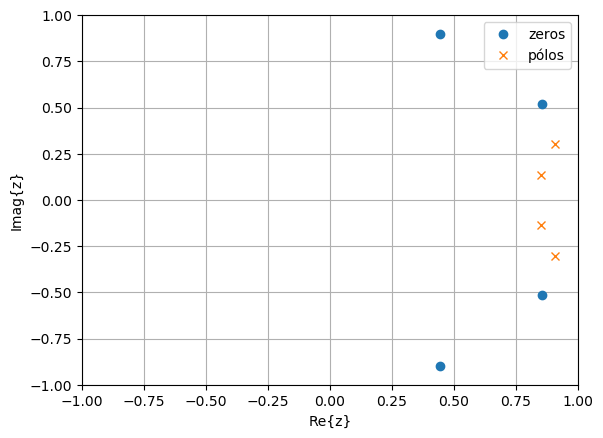

ganho= 0.012004547680162396

In [43]:
zpkellip = digitalfilter(Lowpass(Wn), Elliptic(N, -20*log10(1-Œ¥p),-20*log10(Œ¥r)))
print("ganho= ",zpkellip.k)
plot(real.(zpkellip.z),imag.(zpkellip.z),"o",label="zeros")
plot(real.(zpkellip.p),imag.(zpkellip.p),"x",label="p√≥los")
grid()
axis([-1,1,-1,1])
xlabel("Re{z}")
ylabel("Imag{z}")
legend();

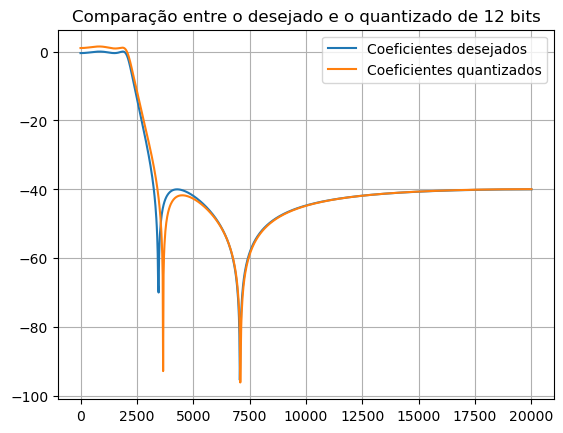

PyObject <matplotlib.legend.Legend object at 0x7fa7aeb9a760>

In [44]:
a = coefa(zpkellip);
b = coefb(zpkellip);
B_0 = 12
aq = Fixed{Int64,B_0-1}.(a)
bq = Fixed{Int64,B_0-1}.(b)
hq = PolynomialRatio(bq,aq);
œâ=range(0,œÄ,length=1000)
Hq=freqz(hq,œâ);
H=freqz(zpkellip,œâ);
plt.title("Compara√ß√£o entre o desejado e o quantizado de 12 bits")
plot(œâ*fa/(2œÄ), amp2db.(abs.(H)),label="Coeficientes desejados")
plot(œâ*fa/(2œÄ), amp2db.(abs.(Hq)),label="Coeficientes quantizados")
grid()
legend()

## √çtem 2 

Seja $y_{Q}[n]$ a sa√≠da do filtro IIR. Considerando o filtro implementado com
precis√£o infinita, determine a funcao valor esperado $$m_{yQ}
[n] = E[{{y_{Q}}[n]]}$$


In [45]:
a = coefa(zpkellip);
b = coefb(zpkellip);
B0 = 5
sq = Fixed{Int16,B0-1}.(s)
yq = filt(b, a, sq);

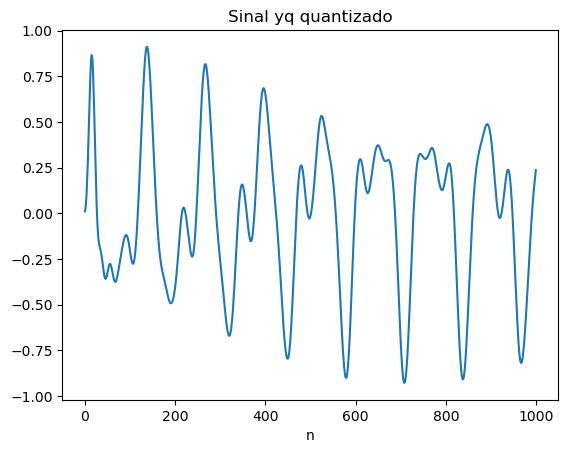

In [46]:
plot(yq[1:1000])
title("Sinal yq quantizado")
xlabel("n");

Foi visto em aula que o ru√≠do de quantiza√ß√£o pode ser tratado como ru√≠do
aditivo, portanto modelado na forma:
$$ùõÜ_{in} ~ U(-2^{-B_{0}} ;2^{-B_{0}})$$
onde $B_{0}$ √© o n√∫mero de bits de quantiza√ß√£o na
entrada.

Al√©m disso, $ùõÜ_{Q}$ √© iid, e portanto estacion√°rio e erg√≥dico, com isso, podemos
calcular a esperan√ßa:
$$m_{Y_{Q[n]}} = E{[Y_{q}[n]]} = E{Y[n]} + E[{ùõÜ_{Q}[n]}] $$
como $$ùõÜ_{Q}[n]$$ √© um ru√≠do branco, que implica: $$E{{ùõÜ_{Q}[n]}} = 0$$

$$E{y[n]} = y[n]$$ portanto:
$$m_{y_{Q[n]}} = E{y_{Q}[n]} = y[n]$$


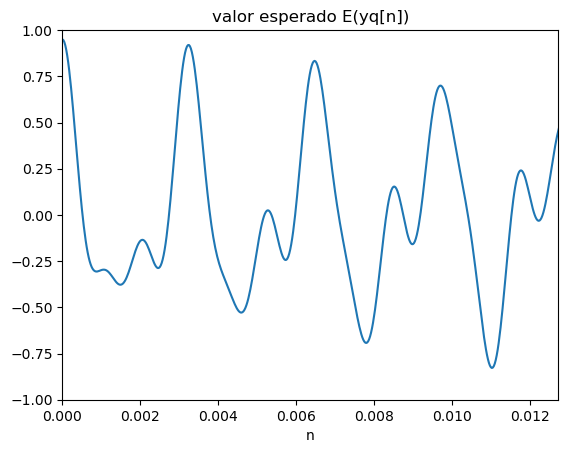

In [47]:
myq = s;
plot(n,s);
axis([0, 4/fo, -1, 1])
title("valor esperado E(yq[n])");
xlabel("n");

## √çtem 3

Seja y[n] a resposta do filtro com a entrada limpa (sem quantiza√ß√£o). Defina $Œµ_{Q}[n] = y_{Q}[n] ‚àí y[n]$. Esse sinal pode ser considerado um processo estacion√°rio? Qual √© o valor DC e a pot√™ncia m√©dia de $Œµ_{Q}[n]$? Calcule a SNR na saƒ±ÃÅda. Voc√™ pode usar a fun√ß√£o impz para calcular a resposta ao impulso do filtro IIR.

In [48]:
y = filt(b,a,s);

In [49]:
œµ = yq - y;

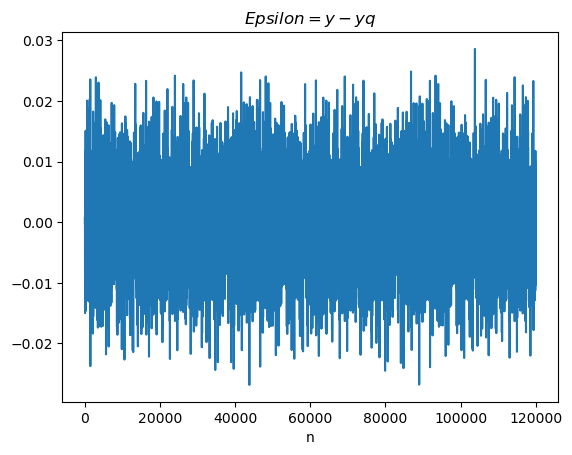

In [50]:
plot(œµ)
title(L"Epsilon = y - yq")
xlabel("n");

### Verificando se o processo √© estacion√°rio

Para um processor ser estacion√°rio no sentido amplo(WSS) √© necess√°rio que as propriedades estat√≠sticas n√£o variem ao longo do tempo

Pode-se notar abaixo que os valores da m√©dia e do desvio padr√£o nos intervalos n√£o variam de maneira significativa. Dessa forma podemos afirmar  que $\epsilon_{Q}[n]$ √© estacion√°rio no sentido amplo.

In [51]:
processo1 = œµ[1:10000]
processo2 = œµ[10000:20000]
processo3 = œµ[20000:30000]
processo4 = œµ[30000:40000]
processo5 = œµ[40000:50000]
processo6 = œµ[50000:60000]
processo7 = œµ[60000:70000]
processo8 = œµ[70000:80000]

print("\nProcesso_1: ", mean(processo1))
print("\nProcesso_2: ", mean(processo2))
print("\nProcesso_3: ", mean(processo3))
print("\nProcesso_4: ", mean(processo4))
print("\nProcesso_5: ", mean(processo5))
print("\nProcesso_6: ", mean(processo6))
print("\nProcesso_7: ", mean(processo7))
print("\nProcesso_8: ", mean(processo8))
print("\nDesvio Processo_1: ", std(processo1))
print("\nDesvio Processo_2: ", std(processo2))
print("\nDesvio Processo_3: ", std(processo3))
print("\nDesvio Processo_4: ", std(processo4))
print("\nDesvio Processo_5: ", std(processo5))
print("\nDesvio Processo_6: ", std(processo6))
print("\nDesvio Processo_7: ", std(processo7))
print("\nDesvio Processo_8: ", std(processo8))



Processo_1: 2.4718565557662452e-5
Processo_2: -8.33804355753892e-5
Processo_3: -0.00013377379812499885
Processo_4: -0.00017834184875653998
Processo_5: 0.0002535212335846277
Processo_6: -0.0002185727207741555
Processo_7: -3.7075999228325916e-5
Processo_8: -0.00012011344210267812
Desvio Processo_1: 0.005837480033914945
Desvio Processo_2: 0.0059704289702422475
Desvio Processo_3: 0.005927074326152235
Desvio Processo_4: 0.005780891577664442
Desvio Processo_5: 0.006056273632006611
Desvio Processo_6: 0.0057524514219068346
Desvio Processo_7: 0.005954124452886959
Desvio Processo_8: 0.005979719270308382

## C√°lculando o valor DC

No item anterior foi visto que $ùõÜ_{in}$ √© estacion√°rio e erg√≥dico e o sistema √© linear,
a partir disso podemos afirmar que $ùõÜ_{Q}$ tamb√©m √©.
$$Valor_{DC} = E(\epsilon_{Q}[n]) $$


In [52]:
print("valor dc: ", mean(œµ))

valor dc: -5.08837813577861e-5

## C√°lculo da Pot√™ncia M√©dia do Ru√≠do

Podemos achar a Pot√™ncia M√©dia do Ru√≠do usando o Teorema de Parseval, da seguinte forma: 
$$ P_{\epsilon} =  {\sigma_{0}}^2 \sum_{n=0}^{00} h^2 [n]$$

In [53]:
œÉ20 = (2.0^(-2B0))/3
pR=œÉ20*sum(impz(zpkellip,500).^2)
print("\npot√™ncia do ruido te√≥rica: ", pR)


pot√™ncia do ruido te√≥rica: 3.390854202126129e-5

##  C√°lculo da Rela√ß√£o Sinal/Ru√≠do SNR

F√≥rmula para calcular a pot√™ncia do sinal:
$$P_{s} = \sum_{n=0}^{N} \frac{A_{n}¬≤}{2}$$

A pot√™ncia do sinal de sa√≠da e de entrada podem ser consideradas iguais, assumindo que o ganho do filtro na banda passante √© constante igual a 1.

Desta forma, a rela√ß√£o SNR pode ser descrita como:

$$ SNR = \frac {Pot_{s}} {Pot_{\epsilon}} $$


In [54]:
pS = (0.5^2) + (0.3^2) + (0.15^2)

SNR = pow2db(pS/pR)

print("\nsnr: ",SNR, " dB")


snr: 40.28998894255838 dB

## √çtem 4
Use a fun√ß√£o filter (Matlab) ou filt (Julia) para calcular a sa√≠da
$y_{Q[n]}$ para uma realiza√ß√£o do filtro, usando como entrada o sinal quantizado $s_{q}[n]$. Use o conceito de ergodicidade para calcular a pot√™ncia
m√©dia do ru√≠do na sa√≠da do filtro, e compare com o valor te√≥rico do
item anterior (voc√™ pode considerar o ru√≠do de quantiza√ß√£o como sendo um processo erg√≥dico).

In [55]:
yq = filt(b, a, sq);
y = filt(b,a,s);
œµ = yq - y;

In [56]:
print("\npotencia do ruido te√≥rico: ", pR)
print("\npotencia do ruido experimental com ergodicidade: ", var(œµ))


potencia do ruido te√≥rico: 3.390854202126129e-5
potencia do ruido experimental com ergodicidade: 3.485346985541121e-5

## √çtem 5
Use agora a fun√ß√£o filterfx.m (Matlab) ou fxfilt (Julia) para gerar os sinais de sa√≠da considerando que o filtro seja implementado
usando aritm¬¥etica de precis√£o finita com 12 bits para as contas (Use Fixed{Int16,11} em Julia, para evitar overflow). Considere que c√°lculos intermedi√°rios possam usar um registrador de precis√£o dupla.

In [57]:
B_filtro = 12
a_q = Fixed{Int16,B_filtro-1}.(a);
b_q = Fixed{Int16,B_filtro-1}.(b);

In [58]:
h_q = PolynomialRatio(b_q, a_q);
H_q = freqz(h_q,œâ);

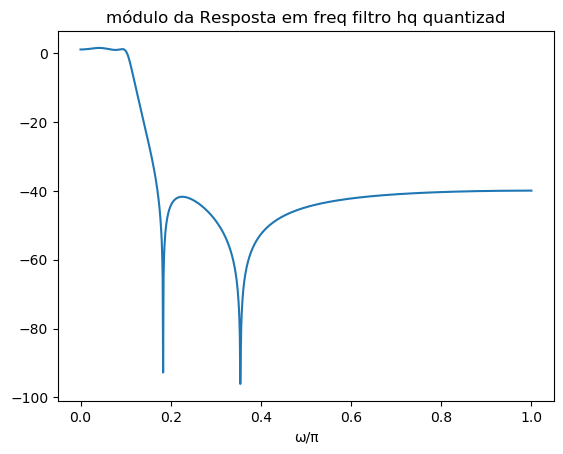

In [59]:
title("m√≥dulo da Resposta em freq filtro hq quantizad");
plot(œâ/œÄ, amp2db.(abs.(H_q)));
xlabel("œâ/œÄ");

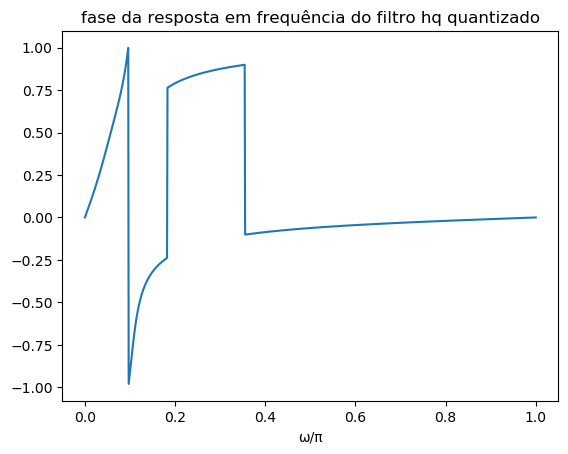

In [60]:
title("fase da resposta em frequ√™ncia do filtro hq quantizado");
plot(œâ/œÄ, angle.(H_q)/œÄ);
xlabel("œâ/œÄ");

## Obtendo sa√≠das do filtro quantizado

Utilizando a fun√ß√£o fxfilter para gerar os sinais de sa√≠da, considerando o filtro implementado em aritm√©tica de precis√£o finita.
Faremos para dois casos: o sinal s quantizado $(s_{q})$ e o sinal s puro.

In [61]:
y_quant_q = fxfilt(b_q, a_q, Fixed{Int16,B_filtro-1}.(sq), true); #precdupla=True
y_quant = fxfilt(b_q, a_q, Fixed{Int16,B_filtro-1}.(s), true); #precdupla=True

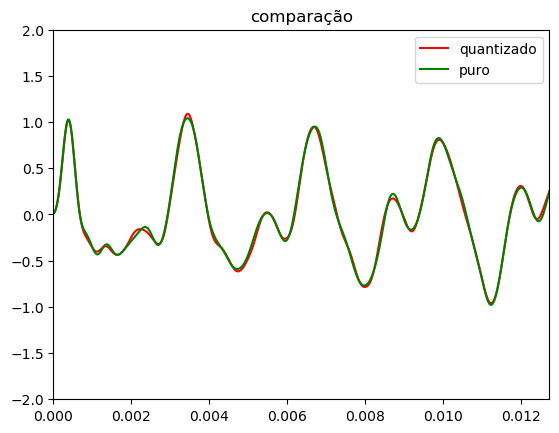

In [62]:
title("compara√ß√£o");
plot(n, y_quant_q, "r", label="quantizado");
plot(n, y_quant, "g", label="puro");
axis([0,4/fo,-2,2]);
legend();

## √çtem  6
Novamente, calcule o sinal $Œµ_{T}[n]$ para este exemplo, use ergodicidade para calcular a pot√™ncia m√©dia, e calcule a SNR de saƒ±ÃÅda.

In [63]:
œµT = y_quant_q - y_quant;

In [64]:
print("pot√™ncia experimental do ru√≠do: ", var(œµT))

pot√™ncia experimental do ru√≠do: 0.0008063756829685584

## Rela√ß√£o Sinal/Ru√≠do

In [65]:
SNR = pow2db(pS/var(œµT))
print("rela√ß√£o snr experimental calculada: ", SNR, " dB")

rela√ß√£o snr experimental calculada: 26.527705881743678 dB

## √çtem 7
Para o caso do filtro implementado usando 12 bits do item anterior, calcule teoricamente a pot√™ncia m√©dia do ruƒ±ÃÅdo total na saƒ±ÃÅda do filtro. Leia a fun√ß√£o filterfx.m (ou fxfilt) e considere exatamente como as contas s√£o feitas. Compare o resultado te√≥rico com o do item anterior.
<br>
<img src="img3.jpeg">
<br>
<img src="img4.jpeg">
<br>

In [66]:
h2_q = PolynomialRatio([1], a_q);
h1_q = PolynomialRatio(b_q, a_q);

## C√°lculando SNR te√≥rico 

Dada a f√≥rmula da pot√™ncia do ru√≠do na sa√≠da obtida acima, temos que:

In [67]:
potRuido_teorica = ((2.0^(-2*B0)/3.0)*(sum(impz(h1_q, 500).^2))) + ((2.0^(-2*B_filtro)/3.0)*(sum(impz(h2_q, 500).^2)))
SNR = pow2db(pS/potRuido_teorica)
print("rela√ß√£o snr te√≥rica calculada: ", SNR, " dB")

rela√ß√£o snr te√≥rica calculada: 31.244491112731527 dB

## √çtem 8
Qual seria o resultado para o filtro IIR se fosse usada a forma direta can√¥nica vista em aula? (ou seja, aquela em que a parte com realimenta√ß√£o √© feita antes da parte FIR, veja a apostila) N√£o √© preciso implementar o filtro, apenas calcular o valor te√≥rico da SNR.
<br>
<img src="img1.jpeg">
<br>
A pot√™ncia te√≥rica na forma can√¥nica a partir da dedu√ß√£o simplificada abaixo:
<br>
<img src="img2.jpeg">
<br>

In [68]:
potRuido_teo_can = (((2.0^(-2B_filtro)+2.0^(-2*B0))/3.0)*sum(impz(h1_q,500).^2))+((2.0^(-2*B_filtro))/3.0);

SNR = pow2db(pS/potRuido_teo_can)
print("rela√ß√£o snr te√≥rica na forma can√¥nica calculada: ", SNR, " dB")

rela√ß√£o snr te√≥rica na forma can√¥nica calculada: 38.89584431491968 dB